<a href="https://colab.research.google.com/github/Pathin220/4105_Project/blob/main/Project_1_gradient_descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [941]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



#mounting google drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/DataSets/DataSet1/heart.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Y_hat = 0.594 + 2.36*X1 
Y_hat = 23.055 + 17.171*X2 
Y_hat = 38.68 + 27.576*X3 
Y_hat = 0.589 + 2.338*X1 + 0.496*X2 + 0.936*X3 


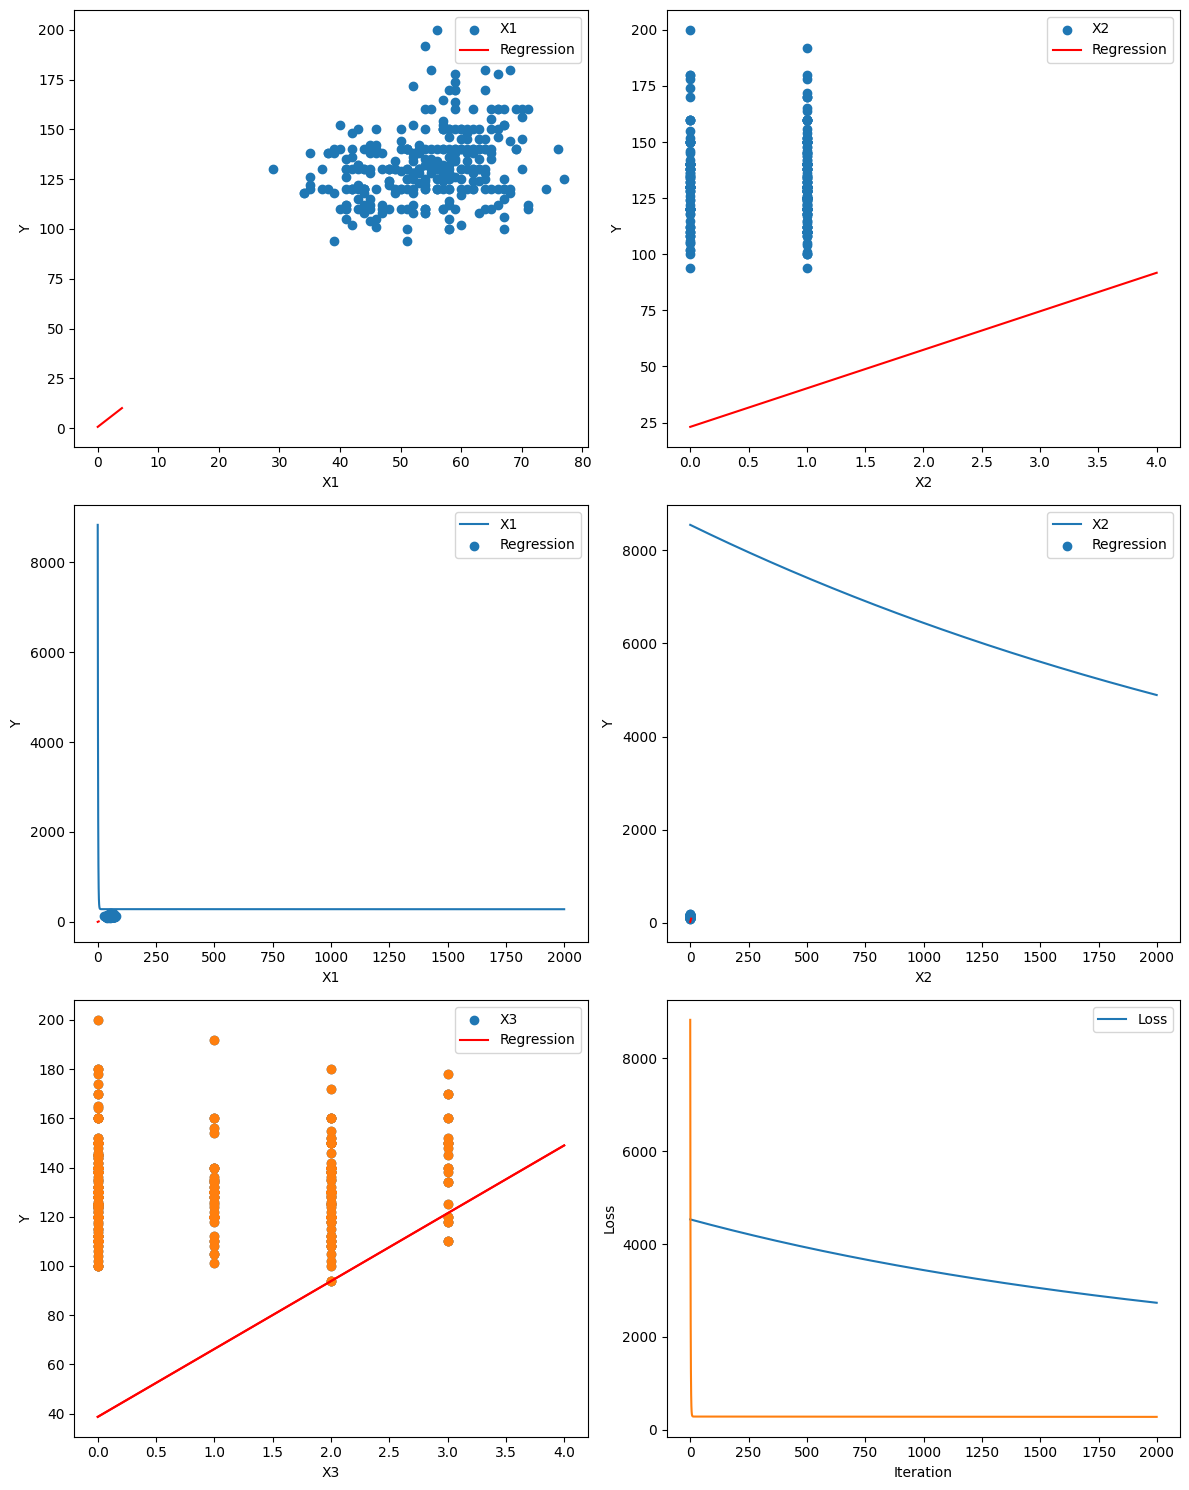

In [943]:

# Parameters
alpha = 0.0001
theta2 = np.zeros(2).reshape(2, 1)
theta4 = np.zeros(4).reshape(4, 1)
iterations = 2000

# calcs
n = len(dataset) - 1
iter = np.arange(0, iterations, 1)
reg_range = np.linspace(0, 4, 100)
Y = dataset.values[:, 3].reshape(n + 1, 1)
X0 = np.ones((n + 1, 1))
loss = []


# Cost Function iteration
def J(X, Y, theta, alpha, iterations):
    for i in range(iterations):
        Y_hat = X.dot(theta).reshape(n + 1, 1)
        errors = np.subtract(Y_hat, Y)
        sqrerrors = np.square(errors)
        cost = 1 / (2 * n + 1) * sqrerrors.sum()
        loss.append(cost)

        sum_delta = (alpha / (n + 1)) * X.transpose().dot(errors)
        theta -= sum_delta

    return theta


# Function to print linear regression equation
def print_regression_equation(theta, variables):
    equation = f"Y_hat = {round(float(theta[0]), 3)} + "
    for i in range(1, len(theta)):
        equation += f"{round(float(theta[i]), 3)}*{variables[i-1]} + "
    print(equation[:-2])  # Remove the trailing '+ '


# Plotting function
def plot_regression(ax, X_var, Y_var, Y_pred, label, xlabel):
    ax.scatter(X_var, Y_var)
    ax.plot(reg_range, Y_pred, 'r')
    ax.legend([xlabel, 'Regression'])
    ax.set_xlabel(xlabel)
    ax.set_ylabel('Y')


# Plotting function for loss
def plot_loss(ax, loss):
    ax.plot(loss)
    ax.legend(['Loss'])
    ax.set_xlabel('Iteration')
    ax.set_ylabel('Loss')


# Plotting subplots
fig, axs = plt.subplots(3, 2, figsize=(12, 15))

# Plot for X1
X1 = dataset.values[:, 0].reshape(n + 1, 1)
X = np.hstack((X0, X1))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_1 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[0, 0], X1, Y, Y_1, 'X1', 'X1')
plot_loss(axs[1, 0], loss)
print_regression_equation(theta2, ['X1'])

# Plot for X2
loss = []  # Reset loss for the next variable
X2 = dataset.values[:, 1].reshape(n + 1, 1)
X = np.hstack((X0, X2))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_2 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[0, 1], X2, Y, Y_2, 'X2', 'X2')
plot_loss(axs[1, 1], loss)
print_regression_equation(theta2, ['X2'])

# Plot for X3
loss = []  # Reset loss for the next variable
X3 = dataset.values[:, 2].reshape(n + 1, 1)
X = np.hstack((X0, X3))
theta2 = J(X, Y, theta2, alpha, iterations)
Y_3 = float(theta2[0]) + float(theta2[1]) * reg_range
plot_regression(axs[2, 0], X3, Y, Y_3, 'X3', 'X3')
plot_loss(axs[2, 1], loss)
print_regression_equation(theta2, ['X3'])

# Plot for 3 variables
loss = []  # Reset loss for the next variable
X = np.hstack((X0, X1, X2, X3))
theta4 = J(X, Y, theta4, alpha, iterations)
Y_4 = float(theta4[0]) + float(theta4[1]) * reg_range + float(theta4[2]) * reg_range + float(theta4[3]) * reg_range
plot_regression(axs[1, 0], X1, Y, Y_1, 'X1', 'X1')
plot_regression(axs[1, 1], X2, Y, Y_2, 'X2', 'X2')
plot_regression(axs[2, 0], X3, Y, Y_3, 'X3', 'X3')
plot_loss(axs[2, 1], loss)
print_regression_equation(theta4, ['X1', 'X2', 'X3'])

plt.tight_layout()
plt.show()


Text(0, 0.5, 'Loss Value')

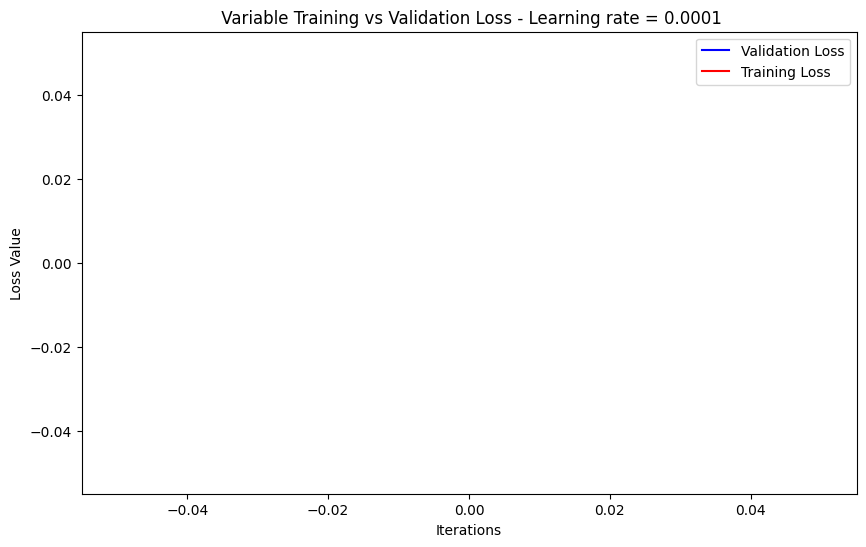

In [944]:
#Mapping text to number
varlist =  ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs']
def binary_map(x):
    return x.map({'yes': 1, 'no': 0})

dataset[varlist] = dataset[varlist].apply(binary_map)

#Split data into training and validation
np.random.seed(17)
df_train, df_test = train_test_split(dataset, train_size = 0.8, test_size = 0.2, random_state = 100)

#Separate Y and X inputs
#X_Vars = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
X_Vars = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs','restecg','thalachh','exng','oldpeak','thall']

Y_train = np.array(df_train['output']).reshape(len(df_train),1)
X_train = df_train[X_Vars]

Y_test = np.array(df_test['output']).reshape(len(df_test),1)
X_test = df_test[X_Vars]



#parameters
alpha = 0.0001
iterations = 1000

#calcs
n = len(X_train.columns)
m = len(X_train)
iter_number = np.arange(0,iterations,1)

#Add intercept
X0 = np.ones((len(X_train),1))
XT = np.ones((len(X_test),1))
X_train = np.hstack((X0,X_train))
X_test = np.hstack((XT,X_test))

training_loss=[]
validation_loss=[]



#Cost Function and theta calc iteration
def J(X_train,Y_train,X_test,Y_test):
  a = alpha
  theta = np.zeros((n+1,1))

  for i in iter_number:
    Y_hat = X_train.dot(theta)
    errors = np.subtract(Y_hat,Y_train)
    sqrerrors = np.square(errors)
    tcost = 1/(2*m) * sqrerrors.sum()
    training_loss.append(tcost)

    #validation
    Y_hat_test = X_test.dot(theta)
    test_errors = np.subtract(Y_hat_test,Y_test)
    test_sqrerrors = np.square(test_errors)
    vcost = 1/(2*m) * test_sqrerrors.sum()
    validation_loss.append(vcost)



    sum_delta = (a / m) * X_train.transpose().dot(errors)
    theta -= sum_delta

  return theta


thetas = J(X_train,Y_train,X_test,Y_test)


#Plot validation loss vs Training Loss
fig1, ax = plt.subplots()
ax.plot(validation_loss,'b')
ax.plot(training_loss,'r')
ax.legend(['Validation Loss','Training Loss'])
ax.set_title(" Variable Training vs Validation Loss"+" - Learning rate = "+str(alpha))
ax.set_xlabel('Iterations')
ax.set_ylabel('Loss Value')

In [945]:


np.random.seed(17)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

# Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()

# Min Max or Standard normalize
X_train = scalerMM.fit_transform(X_train)
X_test = scalerMM.transform(X_test)  # Use transform instead of fit_transform for testing set

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)  # Correct variable name


print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))  # Correct variable name
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("F1 Score:", metrics.f1_score(Y_test, Y_pred))

# Confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()


Accuracy: 0.03278688524590164


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


ValueError: ignored